In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [54]:
df = pd.read_csv('stats.csv')

In [55]:
test_reward = df[~pd.isnull(df['TestReward'])]

avg_train_reward = pd.DataFrame(np.zeros(0, dtype=[('Episode', 'int64'), ('TrainingReward', 'float64')]), columns=['Episode', 'TrainingReward'])
for i in range(1, np.max(test_reward['Episode']), 10):
    avg_train_reward.loc[len(avg_train_reward)] = [i, 0.0]
    
for j in range(len(df)):
    target_idx = j // 10

    avg_train_reward.loc[target_idx]['TrainingReward'] += df.loc[j]['TrainingReward']
    
avg_train_reward['TrainingReward'] /= 10

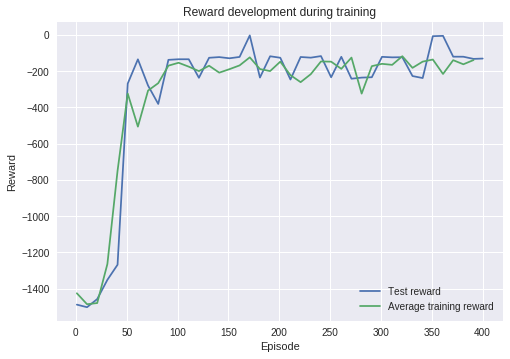

In [57]:
plt.figure()

plt.plot(test_reward['Episode'], test_reward['TestReward'], label='Test reward')
plt.plot(avg_train_reward['Episode'], avg_train_reward['TrainingReward'], label='Average training reward')

plt.legend()

plt.title('Reward development during training')
plt.xlabel('Episode')
plt.ylabel('Reward')

plt.show()